In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv('divar_cars_cat_price.csv', index_col=0)
prides = cars.loc[cars['brand_Pride'] == 1][cars.columns.drop(list(cars.filter(regex='brand_')))]
print(prides.shape)
prides.head()

(30487, 14)


image_count   mileage  price_cat   age  city_Ahvaz  city_Isfahan  \
5             1  200000.0          1   8.0           1             0   
6             3       1.0          0  15.0           0             0   
8             3  250000.0          1   7.0           0             1   
10            4  250000.0          0  12.0           0             0   
13            2  135000.0          1  10.0           0             0   

    city_Karaj  city_Kermanshah  city_Mashhad  city_Qom  city_Shiraz  \
5            0                0             0         0            0   
6            0                0             0         0            0   
8            0                0             0         0            0   
10           0                0             1         0            0   
13           0                1             0         0            0   

    city_Tabriz  city_Tehran  city_nan  
5             0            0         0  
6             0            1         0  
8             0            0         0  
10            0            0         0  
13            0            0         0

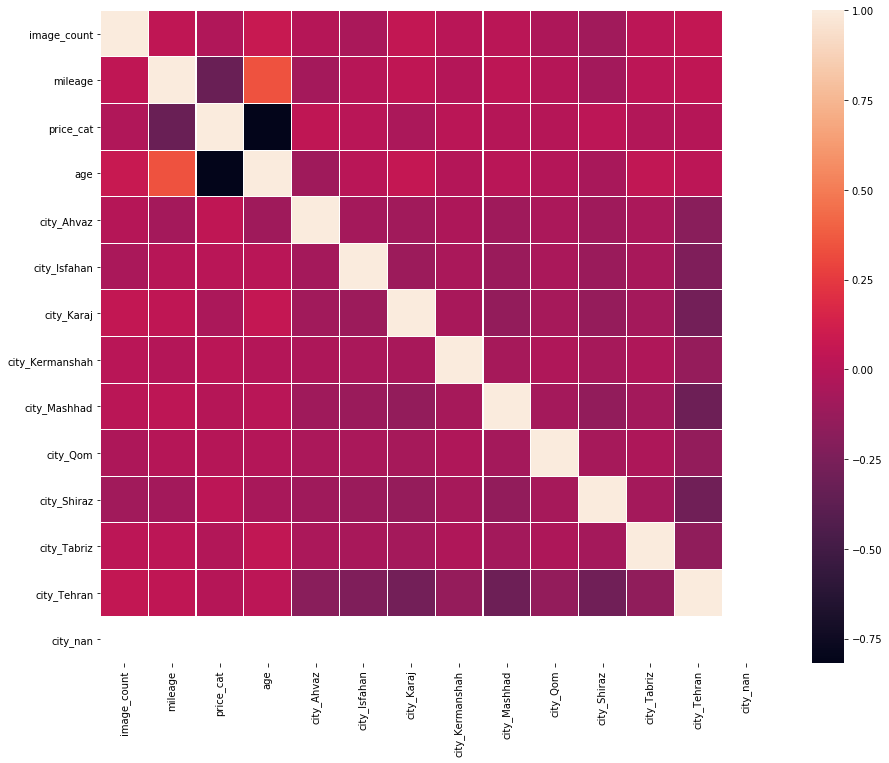

In [3]:
corr = prides.corr()
f, ax = plt.subplots(figsize=(15, 12))
# cmap= ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic']
sns.heatmap(corr, ax=ax, linewidths=0.1)

# Train Test Split
split dataset into 4:1

In [4]:
from sklearn.model_selection import train_test_split
X = prides.drop(columns=['price_cat'])
Y = prides['price_cat']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Random Forest
Apply RF classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_depth = 12
clf = RandomForestClassifier(max_depth=rf_depth, n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### accuracy

In [16]:
from sklearn.metrics import accuracy_score
Y_train_pred = clf.predict(X_train)
acc_train = accuracy_score(Y_train, Y_train_pred)
Y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(Y_test, Y_test_pred)
print(' Model:      {}\n Max Depth:  {}\n label:      {}\n categories: {}\n Accuracy:   {:.2f}% @train\n Accuracy:   {:.2f}% @test\n '
      .format('Random Forest', rf_depth, 'price_cat', len(prides['price_cat'].unique()), acc_train*100, acc_test*100))

 Model:      Random Forest
 Max Depth:  12
 label:      price_cat
 categories: 3
 Accuracy:   86.84% @train
 Accuracy:   83.16% @test
 


##### confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = pd.DataFrame(confusion_matrix(Y_test, Y_test_pred))
confusion_matrix_random_forest
# this pandas output looks better tha the default!

0     1     2
0  1705   277    58
1   173  1518   275
2     5   239  1848

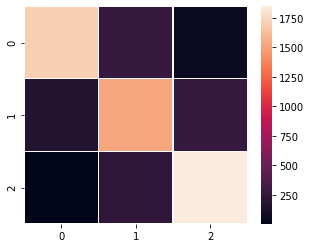

In [18]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix_random_forest, ax=ax, linewidths=0.1)

### Classification Report

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.91      0.84      0.87      2040
           2       0.75      0.77      0.76      1966
           3       0.85      0.88      0.86      2092

    accuracy                           0.83      6098
   macro avg       0.83      0.83      0.83      6098
weighted avg       0.83      0.83      0.83      6098



In [37]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# # Model (can also use single decision tree)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)

# # Train
# model.fit(iris.data, iris.target)
# # Extract single tree
# estimator = model.estimators_[5]

target_names = ['1', '2', '3']
feature_names = prides.drop(columns=['price_cat']).columns.values
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')